In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.linspace(-9,6,1000)

def model(x):
    return 0.1*x*np.cos(-x)

y = model(x)

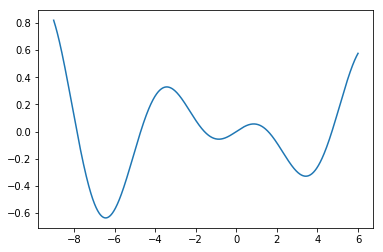

In [3]:
plt.plot(x,y)
plt.show()

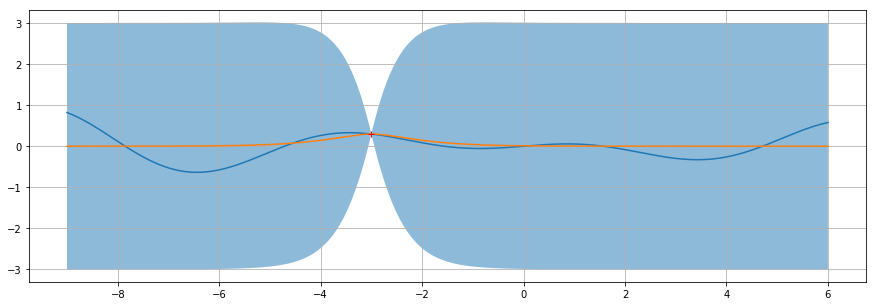

In [4]:
xm = np.array((-3))
ym = model(xm)

k = Matern(length_scale_bounds=[0.1,100], nu=1.5)
gp = GaussianProcessRegressor(kernel=k).fit(xm.reshape(-1,1),ym.reshape(-1,1))

xtest = np.linspace(-9,6,10000)
ypred,sig_pred = gp.predict(xtest.reshape(-1,1),return_std=True)

ypred = ypred.reshape(-1,)
sig_pred = sig_pred.reshape(-1,)

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.plot(xtest,ypred)
plt.fill_between(xtest.reshape(-1,),ypred-3*sig_pred,ypred+3*sig_pred,alpha=0.5)
plt.plot(xm,ym,'r+')
plt.grid()
plt.show()

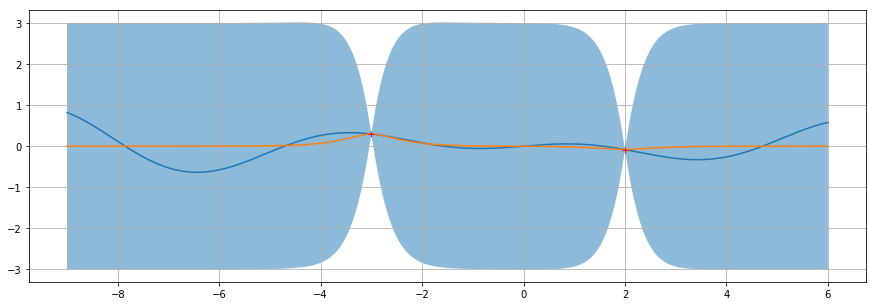

In [5]:
xm = np.array((-3,2))
ym = model(xm)

k = Matern(length_scale_bounds=[0.1,100], nu=1.5)
gp = GaussianProcessRegressor(kernel=k).fit(xm.reshape(-1,1),ym.reshape(-1,1))

xtest = np.linspace(-9,6,10000)
ypred,sig_pred = gp.predict(xtest.reshape(-1,1),return_std=True)

ypred = ypred.reshape(-1,)
sig_pred = sig_pred.reshape(-1,)

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.plot(xtest,ypred)
plt.fill_between(xtest.reshape(-1,),ypred-3*sig_pred,ypred+3*sig_pred,alpha=0.5)
plt.plot(xm,ym,'r+')
plt.grid()
plt.show()

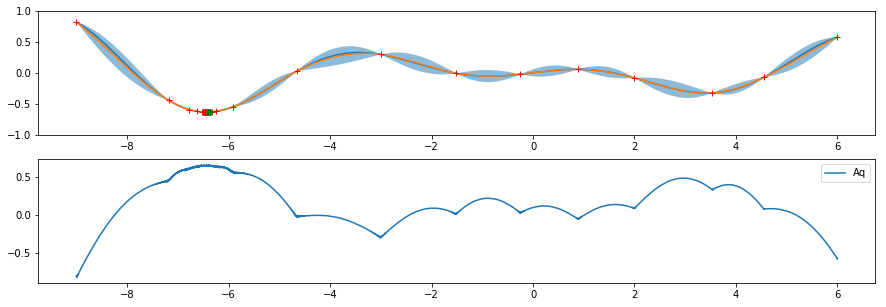

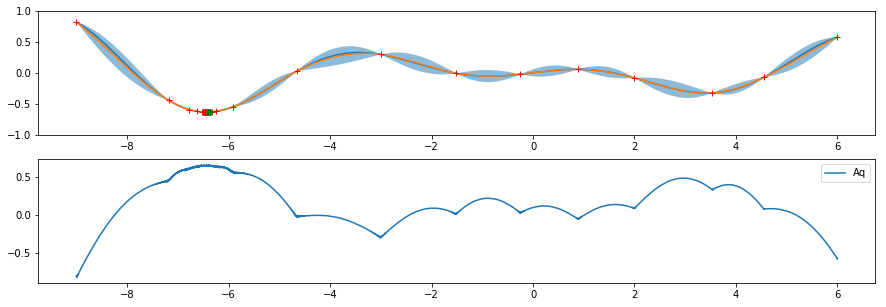

In [6]:
import time
from IPython import display
from scipy.stats import norm

xm = np.array((-3,2))

plt.figure(figsize=(15,5))
for j in range(50):
    
    ym = model(xm)
    k = Matern(length_scale_bounds=[2,10], nu=1.5)
    gp = GaussianProcessRegressor(kernel=k).fit(xm.reshape(-1,1),ym.reshape(-1,1))

    xtest = np.linspace(-9,6,10000)
    ypred,sig_pred = gp.predict(xtest.reshape(-1,1),return_std=True)

    ypred = ypred.reshape(-1,)
    sig_pred = sig_pred.reshape(-1,)
    
    # Aquisition function - 
    
    #gamma = norm.cdf((np.min(ym) - ypred)/sig_pred)
    gamma = 5*sig_pred-ypred#(-3*sig_pred + ypred)

    plt.clf()
    plt.subplot(2,1,1)
    plt.cla()
    plt.plot(x,y)
    plt.plot(xtest,ypred)
    plt.fill_between(xtest.reshape(-1,),ypred-3*sig_pred,ypred+3*sig_pred,alpha=0.5)
    plt.plot(xm,ym,'r+')
    
    xm = np.hstack((xm,xtest[gamma==np.max(gamma)][0]))
 
    ym[-1] = model(xm[-1])
    plt.plot(xm[-1],ym[-1],'go')
    plt.ylim(-1,1)
    
    plt.subplot(2,1,2)
    plt.cla()
    plt.plot(xtest,gamma,label='Aq')
    #plt.plot(xtest,ypred,label='mean')
    #plt.plot(xtest,-3*sig_pred,label='2*sig')
    
    plt.legend()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    if (j < 10):
        time.sleep(1.0)


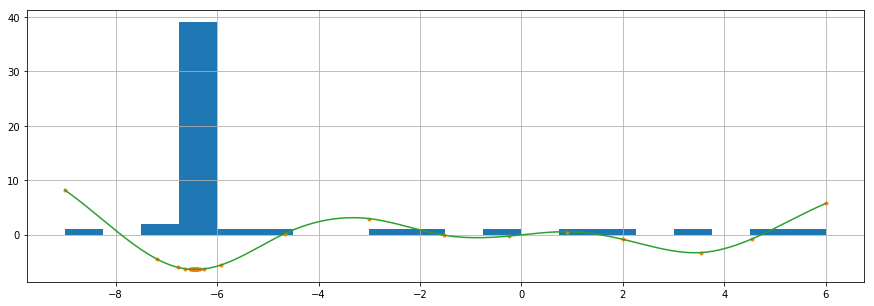

In [7]:
plt.figure(figsize=(15,5))
plt.hist(xm,20)
plt.plot(xm[:-1],10*ym,'.')
plt.plot(xtest,10*ypred)
plt.grid()

plt.show()